# Cuadratura Gaussiana
# Gauss-Legendre
## Ejercicio 4

Aproximar la integral de:
$$\int_0^1e^{-\frac{t^2}{2}}dt$$
con cuadratura Gauss-Legendre con $n \in \{0,1,2,3,4\}$. Realizar gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal). Valor a aproximar: $.855624391892149$







Nota: Los siguientes ejercicios y notas para su desarrollo están basados en las notas de clase disponibles en (https://github.com/ITAM-DS/Propedeutico/tree/master/Python/clases/2_calculo_DeI) y en el capítulo 6 del libro Numerical Methods in Engineering with Python 3 (Kiusalaas, 2013). Los errores son responsabilidad del autor (SCS).

In [174]:
import numpy as np
from numpy import absolute, sqrt, exp, sin, cos, pi, log

El área sombreada que se quiere aproximar es igual a 0.855624391892149.


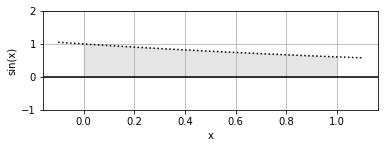

In [175]:
import matplotlib.pyplot as plt

print('El área sombreada que se quiere aproximar es igual a 0.855624391892149.')
# Función original y área que se quiere aproximar
x_aux = np.arange(-0.1, 1.1, 0.1)
f_ori = lambda  x: exp(-x/2)

# Subgráfico 2 para mostrar el error relativo
plt.subplot(2,1,1)

plt.plot(x_aux, f_ori(x_aux), 'k:')
plt.axhline(color = 'black')
plt.fill_between(x_aux, f_ori(x_aux), where = [(x>=0) and (x<=1) for x in x_aux], color = 'grey', alpha = 0.2)
plt.xlabel('x'); plt.ylabel('sin(x)')
axes = plt.gca(); axes.set_ylim([-1,2])

plt.grid(True)

plt.show()

El método de cuadratura gaussiana de Gauss-Legendre utiliza nodos espaciados simétricamente tomando como centro $\xi=0$, y en la misma dirección, los pares de nodos ubicados simétricamente tienen pesos, $A_{i}$, iguales. <br> 
Este método implica una transformación inicial de cada $x{i}$ en términos de $xi_i$, de tal forma que la integral original definida en el rango $(a,b)$ quede definida en el rango $(1,1)$. La transformación aplicada es la siguiente:
$$
x_{i}=\frac{b+a}{2}+\frac{b-a}{2}\xi_{i}
$$
una vez realizada la anterior transformación, la aproximación de la integral original $\intop_{a}^{b}f(x)dx$ a computar es la siguiente:
$$
\begin{array}{ccc}
\intop_{-1}^{1}f(\xi)d\xi & \approx & \sum_{i=0}^{n}A_{i}f(\xi_{i})\\
 & \approx & \frac{b-a}{2}\sum_{i=0}^{n}A_{i}f\left(\frac{b+a}{2}+\frac{b-a}{2}\xi_{i}\right)
\end{array}
$$
Los valores de los pesos y los nodos utilizados en el desarrollo del ejercicio se toman de la tabla vista en clase.


In [176]:
# Función para computar el método de Gauss-Legendre
# Se opta por hacer un código vectorizado en lugar de usar ciclos
def cuad_gauleg(f,a, b, n):
    x_i = np.empty([n+1, 1]) # vector abs
    chi_i = np.empty([n+1, 1]) # vector de nodos
    A_i = np.empty([n+1, 1]) # vector de pesos
    # Dados los distintos valores de los pesos y nodos, se usará un condicional
    if n == 0:
        A_i[:,0] = [2]
        chi_i[:,0] = [0] 
    elif n == 1: 
        A_i[:,0] = [1, 1]
        chi_i[:,0] = [-sqrt(1/3), sqrt(1/3)]        
    elif n == 2:
        A_i[:,0] = [5/9, 8/9, 5/9]
        chi_i[:,0] = [-sqrt(3/5), 0, sqrt(3/5)]           
    elif n == 3: 
        A_i[:,0] = [0.347855, 0.652145, 0.652145, 0.347855]
        chi_i[:,0] = [-0.861136,-0.339981,0.339981,0.861136]        
    elif n ==4:
        A_i[:,0] = [0.236927, 0.478629, 0.568889, 0.478629, 0.236927]
        chi_i[:,0] = [-0.90618, -0.538469, 0, 0.538469, 0.90618]           
    else:
        print('Para n>4 falta incluir los nodos y pesos necesarios para aplicarel método de cuadratura de Gauss-Legendre.')

    # Operar para la sumatoria de I_i
    x_i = 0.5*(b+a)+0.5*(b-a)*chi_i
    Af_xi = A_i*f(x_i)
    area_ap = np.sum(0.5*(b-a)*Af_xi)   
    
    return area_ap

In [177]:
# Crear un vector de errores de la aproximación
def err_re(area, area_ast):
    err_abs = absolute(area-area_ast) # Por si queremos graficar solo el error
    err_rel = err_abs/absolute(area_ast)
    return err_abs, err_rel

In [198]:
# Test de la función con ejemplo de Kiusallas (p.228)
# el resultado debe ser 0.067473
n = 3; a = 0.5; b = 1
area_ast = 0.0674729
fun = lambda x: cos(pi*x)*log(x)

area_gl = cuad_gauleg(fun, a, b, n)
err_abs_gl, err_rel_gl = err_re(area_gl, area_ast)

print('-'*10)
print(f"El valor exacto del área es {area_ast}")
print('El área aproximada es:', area_gl)
print(f"El error absoluto de la aproximación es {err_abs_gl}.")
print(f"El error relativo de la aproximación es {err_rel_gl}.")

----------
El valor exacto del área es 0.0674729
El área aproximada es: 0.06747294753091954
El error absoluto de la aproximación es 4.753091953357824e-08.
El error relativo de la aproximación es 7.044445923263746e-07.


In [196]:
# Desarrollo del ejercicio
a = 0 # lim inf
b = 1 # lim sup
area_ast = 0.855624391892149
fun_eje = lambda x: exp(-0.5*x**2)
n = [0, 1, 2, 3, 4]
# Se ejecuta un ciclo para evaluar sobre n
aprox_gale = np.empty(len(n))
error_gale = np.empty([len(n), 2])
pos = 0
for i in n:
    aprox_gale[pos] = cuad_gauleg(fun_eje, a, b, i)
    error_gale[pos, :] = err_re(aprox_gale[pos], area_ast)
    pos += 1
    
print('-'*5, 'Resultados del ejercicio', '-'*5); print('-'*30)
print(f"El valor exacto del área es {area_ast}"); 
print('n:', n);
print('Aroximación por cuadratura de Gauss-Legendre', aprox_gale)
print('Errores absolutos', error_gale[:,0]); 
print('Errores relativos', error_gale[:,1])
print('-'*30)

----- Resultados del ejercicio -----
------------------------------
El valor exacto del área es 0.855624391892149
n: [0, 1, 2, 3, 4]
Aroximación por cuadratura de Gauss-Legendre [0.8824969  0.85531456 0.85562639 0.85562439 0.85562483]
Errores absolutos [2.68725107e-02 3.09830208e-04 2.00215048e-06 1.90200367e-09
 4.33693712e-07]
Errores relativos [3.14069011e-02 3.62110070e-04 2.33998762e-06 2.22294231e-09
 5.06873946e-07]
------------------------------


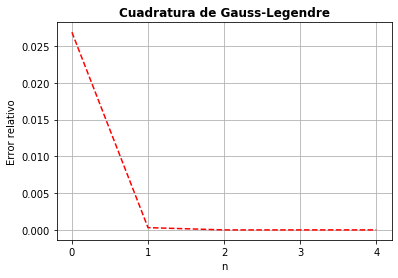

In [194]:
# Grafica: error relativo vs 𝑛 (𝑛 en el eje horizontal)
import matplotlib.pyplot as plt

plt.plot(error_gale[:,0], 'r--')
plt.xlabel('n'); plt.ylabel('Error relativo')
plt.title('Cuadratura de Gauss-Legendre', fontweight="bold")
plt.xticks(np.arange(0, 5, step=1))
plt.grid(True)

plt.show()